C:\Users\harih\AppData\Local\Temp\ipykernel_28316\2424777387.py:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(filename)


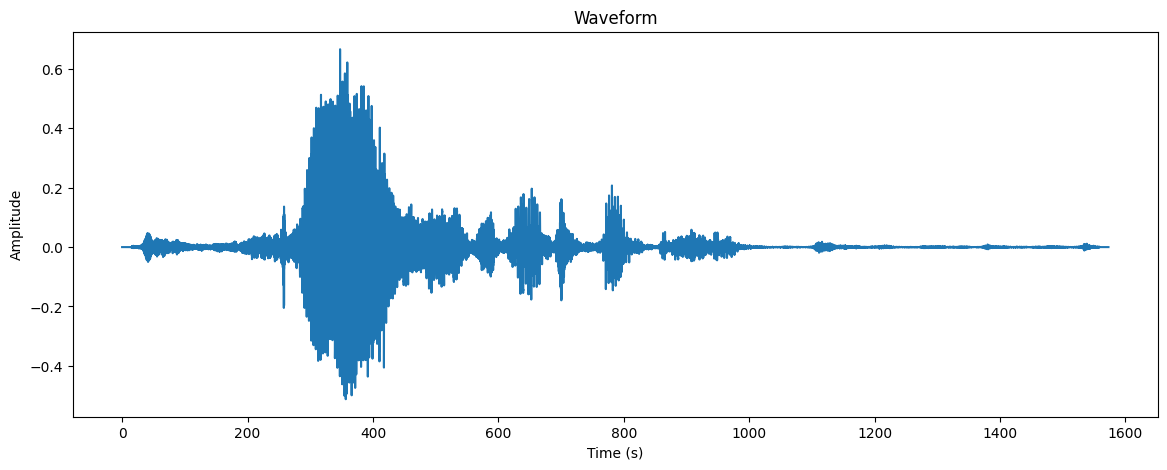

In [14]:
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
import numpy as np

# Load the audio file
filename = 'AI in Speech Processing.wav' 
y, sr = librosa.load(filename)

# Calculate the time axis
time = librosa.times_like(y, sr=sr)

# Plot the waveform
plt.figure(figsize=(14, 5))
plt.plot(time, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveform')
plt.show()




A. 1 Find the first derivative of your speech signal with finite difference method. Listen to the first 
derivative signal and the original speech signal.

In [15]:
# Calculate the first derivative
y_diff = np.diff(y)

# Listen to the first derivative signal
Audio(data=y_diff, rate=sr)
y_diff_normalized = y_diff / np.max(np.abs(y_diff))
write('first_derivative.wav', sr, y_diff_normalized)

A. 2 Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.

Average length between two consecutive zero crossings for speech regions: 1.0
Average length between two consecutive zero crossings for silence regions: nan


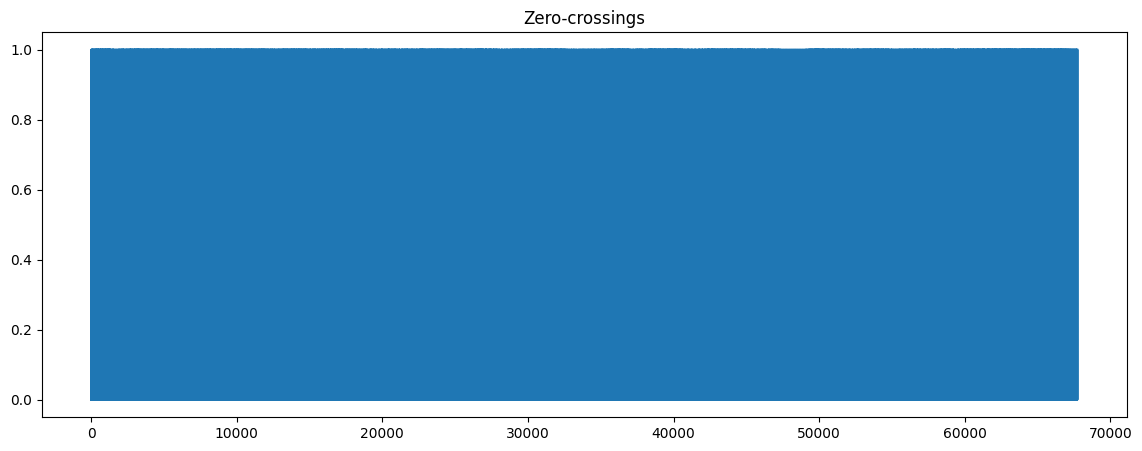

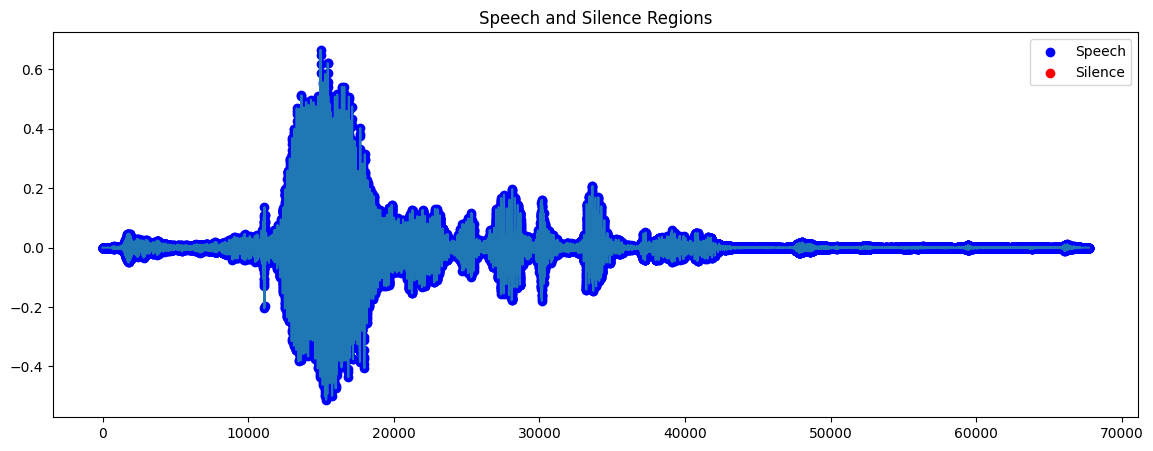

In [19]:
# Detect the points of zero crossing
zero_crossings = librosa.zero_crossings(y_diff, pad=False)

# Calculate the average length between two consecutive zero crossings for speech and silence regions
speech_regions = np.where(y != 0)[0]
silence_regions = np.where(y == 0)[0]

avg_length_speech = np.mean(np.diff(speech_regions))
avg_length_silence = np.mean(np.diff(silence_regions))

print(f'Average length between two consecutive zero crossings for speech regions: {avg_length_speech}')
print(f'Average length between two consecutive zero crossings for silence regions: {avg_length_silence}')

import matplotlib.pyplot as plt

# Plot the zero-crossings
plt.figure(figsize=(14, 5))
plt.plot(zero_crossings)
plt.title('Zero-crossings')
plt.show()

# Plot the speech and silence regions
plt.figure(figsize=(14, 5))
plt.plot(y)
plt.scatter(speech_regions, y[speech_regions], color='b', label='Speech')
plt.scatter(silence_regions, y[silence_regions], color='r', label='Silence')
plt.legend()
plt.title('Speech and Silence Regions')
plt.show()

A 3. Speak 5 of your favorite words. Observe the length of the speech signals. Compare the lengths of 
your spoken words with those of your project team-mate.

In [23]:
import librosa

# Load the first audio file
y1, sr1 = librosa.load('United(1).wav')

# Calculate the length of the first audio file
length1 = len(y1) / sr1
print(f'Length of United(1).wav: {length1} seconds')

# Load the second audio file
y2, sr2 = librosa.load('United(2).wav')

# Calculate the length of the second audio file
length2 = len(y2) / sr2
print(f'Length of United(2).wav: {length2} seconds')

C:\Users\harih\AppData\Local\Temp\ipykernel_28316\3121188441.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y1, sr1 = librosa.load('United(1).wav')
c:\Users\harih\AppData\Local\Programs\Python\Python312\Lib\site-packages\librosa\core\audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
C:\Users\harih\AppData\Local\Temp\ipykernel_28316\3121188441.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y2, sr2 = librosa.load('United(2).wav')


Length of United(1).wav: 3.5626757369614515 seconds
Length of United(2).wav: 3.1786848072562357 seconds


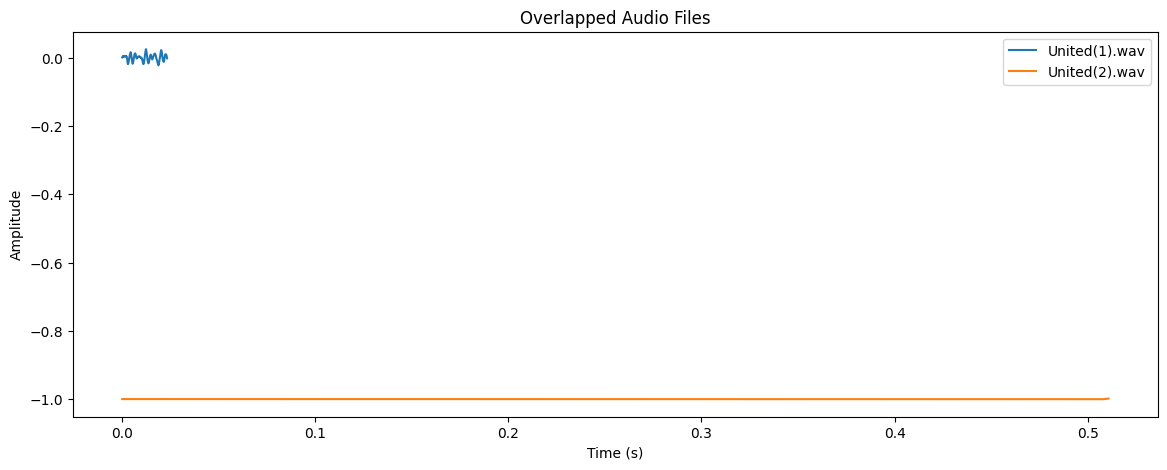

In [24]:
def remove_silence(y, sr, threshold=0.01):
    yt = librosa.effects.trim(y, top_db=threshold)  # Trim the silence
    return yt[0]

# Remove silence from the audio files
y1_trimmed = remove_silence(y1, sr1)
y2_trimmed = remove_silence(y2, sr2)

# Calculate the time axes for the trimmed audio files
time1 = np.linspace(0, len(y1_trimmed) / sr1, len(y1_trimmed))
time2 = np.linspace(0, len(y2_trimmed) / sr2, len(y2_trimmed))

# Plot the trimmed audio files
plt.figure(figsize=(14, 5))
plt.plot(time1, y1_trimmed, label='United(1).wav')
plt.plot(time2, y2_trimmed, label='United(2).wav')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Overlapped Audio Files')
plt.show()

A 4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are 
going to college on Sunday(./?)”. Record two signals – one with making the statement while other 
with asking question. Study the two signals and compare them. 

C:\Users\harih\AppData\Local\Temp\ipykernel_28316\2042438341.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  y_statement, sr_statement = librosa.load('statement.wav')
C:\Users\harih\AppData\Local\Temp\ipykernel_28316\2042438341.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y_question, sr_question = librosa.load('question.wav')


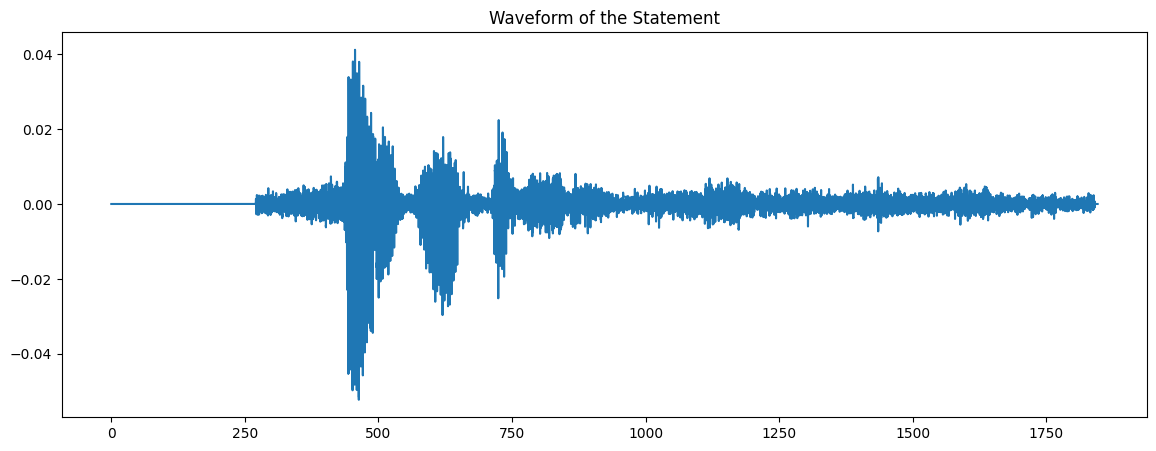

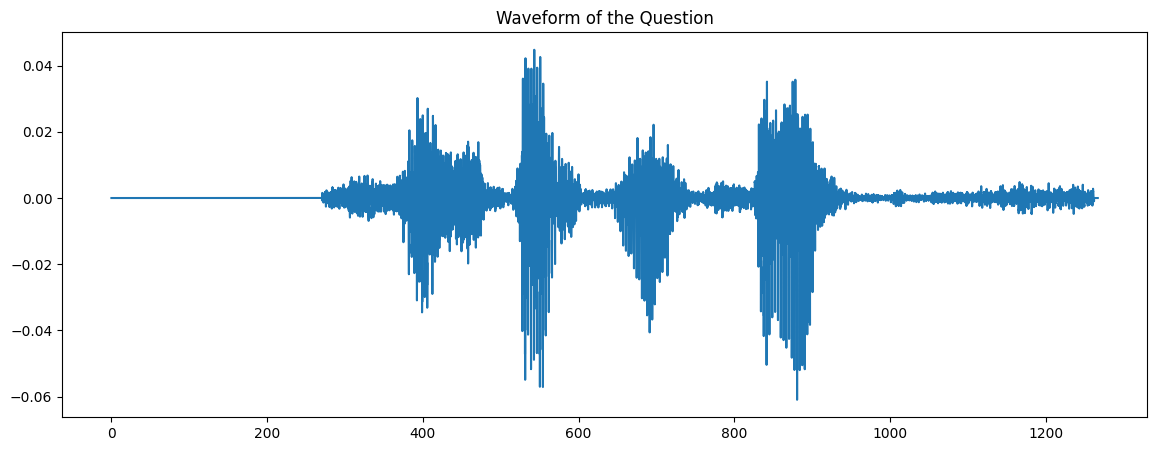

In [25]:

y_statement, sr_statement = librosa.load('statement.wav')
y_question, sr_question = librosa.load('question.wav')


time_statement = librosa.times_like(y_statement, sr=sr_statement)
time_question = librosa.times_like(y_question, sr=sr_question)


plt.figure(figsize=(14, 5))
plt.plot(time_statement, y_statement)
plt.title('Waveform of the Statement')
plt.show()


plt.figure(figsize=(14, 5))
plt.plot(time_question, y_question)
plt.title('Waveform of the Question')
plt.show()